# PROJECT: Predicting Boston Housing Prices

In [98]:
#The project will begin by importing the required packages.
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

In [99]:
# Importing the libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Neat display for notebooks
%matplotlib inline

# Loading the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


Now the following segment will be used to show the basic details of the datasets!

In [100]:
print("The calculated stats are:")

# Minimum price of the data
mini_price = np.min(prices)
print ("Minimum price: {}".format(np.min(prices)))

# Maximum price of the data
maxi_price = np.max(prices)
print ("Maximum price: $ {:,.2f}".format(maxi_price))

# Mean price of the data
mean_price = np.mean(prices)
print ("Mean price: $ {:,.2f}".format(mean_price))

# Median price of the data
median_price = np.median(prices)
print ("Median price $ {:,.2f}".format(median_price))

# Standard deviation of prices of the data
std_price = np.std(prices)
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

The calculated stats are:
Minimum price: 105000.0
Maximum price: $ 1,024,800.00
Mean price: $ 454,342.94
Median price $ 438,900.00
Standard deviation of prices: $165,171.13


# Question 1

Answer:


A few important attributes are:
* 1)TAX: (full value property tax rate per $10,000) Lower tax rates always attract people to view houses.
* 2)CRIM: (per capita crime rate per town) Lower the the crime, higher the view rate of houses.
* 3)INDUS (and NOX):(proportion of non retail business acers per town and nitric oxide concentrations "ppm") The two here relate to air quality in the various areas, which should not be surprising that they correlate with the housing prices.

For all three features, a decrease in their value will result in the opposite of the stated outcome value excluding indus which can vary from person to person.

By comparing with sequence of features, we get that:
* TAX: 24, is the rate present in the areas.
* CRIM: 11.95, which means 11.95 incidences of crime per 100,000 people.
* INDUS: 18.1, which states the proportion of non-retail business acres in town. Larger values may mean higher industrial areas, which means relatively higher pollution level.

# Question 2

Answer:

For the performance_metric function in the code cell below, we will need to implement the following:

Use r^2_score from sklearn.metrics to perform a performance calculation between y_true and y_predict.
Assigning the performance score to the score variable.

In [101]:
#Importing 'r^2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    #Calculating the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Returning the score
    return score

In [102]:
# Calculating the performance of this model
score = performance_metric([3, -0.6, 2, 6, 4.2], [2.5, 0.0, 2.3, 7.8, 8.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.148.


Coefficient of determination, R^2, determines the squared correlation between the actual and the predicted values. A value of 0 indicates that the model always fails to predict the target/actual value, where a value of 1 indicates the model prefectly predicts the target value.

In this case, based on the model's R^2 score of 0.148, I would say that the model successfully captured the variation of the target variables.

# Question 3

Answer:

In the code block below, we will split the code using shuffle_split_data function as it does the following:

* Randomly shuffle the input data X and target labels (housing values) y.
* Split the data into training and testing subsets, holding 30% of the data for testing.

In [103]:
#Importing 'train_test_split'
from sklearn.cross_validation import train_test_split

#Shuffling and spliting the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=33)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


The biggest benefit to splitting your dataset into training and testing is validation, i.e being able to validate/measure the accuracy of your training.

We split the data into training and testing subsets to assess a models performance objectively.

In doing so, it needs to be tested on unseen data, not on data it was trained with. Otherwise, the error metric would be overly optimistic and caused overfitting of our model with the training data, which would result in a high variance for predicted values.

Random shuffle is needed just in case if the data is ordered, we can still likely get a fair proportion of classes in our testing and training test.

Therefore, splitting the data into training and testing subsets, especially with random shuffle, is essential to minimize the problem of overfitting.

# Question 4

Answer:

Learning Curves:
* The following code cell produces four graphs for a decision tree model with different maximum depths.
* Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is  increased.
* Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation).
* The model is scored on both the training and testing sets using R^2, the coefficient of determination.

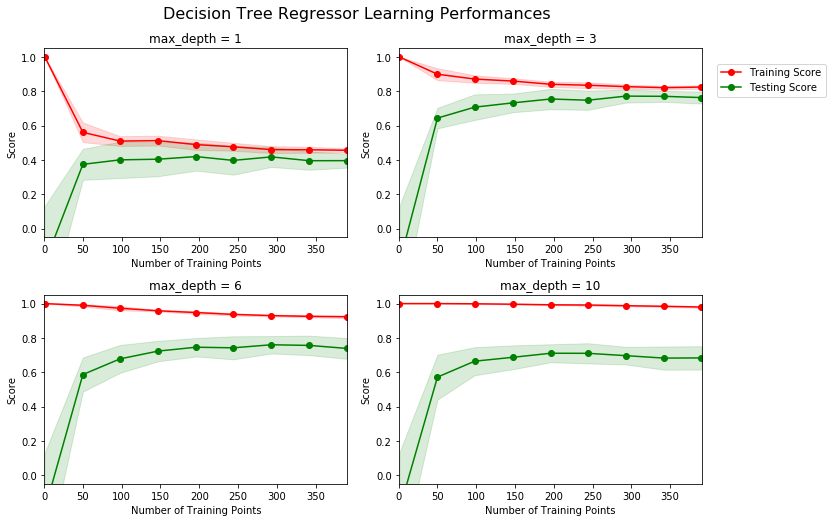

In [104]:
# Producing the learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

Choosing the graph with max-depth of 3.

* As more training points are added, its score decreases and seems to level off, while its variance / uncertainty of the curve also decreasing. The testing curve's score also increases as more data points are provided up until approximately 300, as it then tends to level off and run parallel with the training curve.

Given that both training and validation curves have levelled off, providing more training points would not benefit the model with significant improvements but may only increase time consumption for training and testing.

Complexity Curves:

* The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. 

* The graph produces two complexity curves — one for training and one for validation. Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.

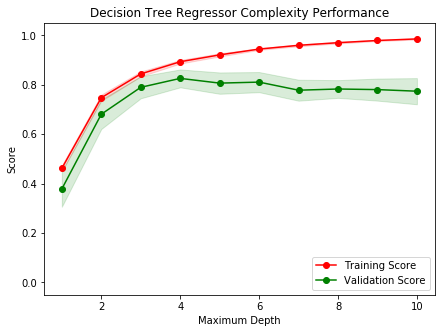

In [105]:
vs.ModelComplexity(X_train, y_train) #to present the graph

# Question 5

Answer:

Correctly identifying whether the model at a max depth of 1 and a max depth of 10 suffer from either high bias or high variance, with justification using the complexity curves graph:

With a maximumn depth of 1, based on the complexity curve both the training and validation scores are low, the model suffers from high bias (underfitting). And at a maximum depth of 10 the model appears to suffer from high variance (overfitting).

I can justify my conclusions based on the visual cues of the consistent variance on the validation score, in combination with the convergence of training and validation curves at max-depth of 1 and the large gap between the training and validation curves at a max-depth of 10.

Typically, a model suffers from high bias when a minimal number of features are used. This gives a low R^2 value (near 0) and underfitting occurs. It is over generalized, scoring a very low accuracy during both training and testing. While a model that suffers from high variance, tends to be the opposite. It has a high R^2 value (approaching 1) and is overfitting the data. Meaning, it is not generalized enough, with very high scores on the training data but low score on testing data (data it hasn't seen before).

# Question 6

Answer:

I believe a max-depth of 3 would result in the best generalized model. At a max-depth of 3, both validation and training curves are at their smallest/closest level of uncertainty between each other, while the validation score is near its highest value.

However, at a max-depth of 4 or more, both training and validation curves diverge, where you can see the training curve approaching a score of 1, indicating it's perfectly matching the data points leading to overfitting (high variance) while the validation curve trends downward.

# Question 7

Answer:

With only 2 features as in the example above, it may not be extremely helpful, but if there are a number of parameters and each with its own wide possible ranges of values, the grid search would be the most efficient way to fine tune them for the best performance.

# Question 8

Answer:

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:

* Shuffle the dataset randomly.
* Split the dataset into k groups
* For each unique group:
Take the group as a hold out or test data set
Take the remaining groups as a training data set
Fit a model on the training set and evaluate it on the test set
Retain the evaluation score and discard the model
* Summarize the skill of the model using the sample of model evaluation scores

Importantly, each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set 1 time and used to train the model k-1 times.



Implementation: Fitting a Model

In [134]:
#Importing 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV' to complete the calculations.
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Creating cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 40)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=41)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {"max_depth":range(1,11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc =  make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

Predictions:
* Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, and can respond with a prediction for the target variable. We can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

# Question 9

Answer:

In [138]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


The model has a max depth of 4. This is not a surprising result compared to our guess, as we were debating if our Q6 answer should have been 3 or 4. I would consider my guess to be pretty accurate.

# Question 10

Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

In [143]:
# Produce a matrix for client data
client_data = [[4, 18, 15], # Client 1
               [4, 32, 22], # Client 2
               [9, 3, 13]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $409,400.00
Predicted selling price for Client 2's home: $229,682.35
Predicted selling price for Client 3's home: $938,053.85


Answer:

I would recommend each client to sell for the following with the given explanation.

Client 1: 409,400.00 - At 409k this home is within one std of the mean at approx. $454k. With 5 rooms and a relatively low neighborhood poverty level and student-teacher ratio, this would be a good selling price.

Client 2: 229,682.35 - The minimum selling price in the area is just over $100k. However, their 4 rooms are helping raise the price of their home, since both teacher-student ratio and provery levels are quite high both of which negatively impact the selling price.

Client 3: 938,053.85 - With a large number of rooms, very low neighborhood poverty levels and low student-teacher ratio, this home's selling price is near the maximum selling price in the neighborhood and is reasonably priced

Sensivity:

In [142]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $394,600.00
Trial 10: $413,700.00

Range in prices: $29,438.89


# Question 11


Answer:

The constructed model, as is, should not be used in a real-world setting. There are a number of reasons for this answer and below I've highlighted a few:

* Relevancy: The data which the current model has been trained on, collected in 1978, is not relevant today (2016)
* Applicable: A model training on data from a city such as Boston, is not suitable to be used in urban areas such as Ohio nor would be it applicable for some other cities such as San Francisco
* Features: Although the dataset covers features which are present in today's homes, it is missing features that could affect the selling price in today's housing market such as size of a backyard or approximity to public transit if the home is in a large city.
* Robustness: The current model appears to be too sensivity/not well generalized as running it multiple times for a specific client (as seen above) provides a wide variance in pricing, which as is would be unsatifactory in the real-world.
* There can be more specifications so more specific data can be generated.


Supplying the model with more data, between 1978 and 2016, along with using a few additional features, the model may be robust and accurate enough to be applied to data from cities similar to Boston in the real-world.